# Intro to Section 12 - Statistical Distributions 

- Final 10 mins of 08/06/20 study group


> #### Law of relative frequency
- Limit of large infinite outcomes produce fixed numbers .
$$ \large P(E) = \lim_{n\to\infty}\frac{S(n)}{n}$$
    - Probability of Event E having Successful(S) outcomes for $n$ trials
    

- Statistical Distributions are directly related to probability, as repeated probability experiments results will form a distribution with repeated trials.

In [18]:
from fsds.imports import *

# Experiment - Flipping a coin

In [19]:
from collections import Counter
np.random.seed(3210)

p_heads = 0.5
p_heads

0.5

In [20]:
i = np.random.rand()
print(i)

res = 'H' if i >=  p_heads else 'T'
res

0.4486989410504155


'T'

In [21]:
def coin_toss(n_flips = 2,results=None,verbose=True,p=0.5):
    
    if results is None:
        coin_flips=[]
    else:
        coin_flips = results.copy()
        
    for n in range(n_flips):
        i = np.random.rand()
        res = 'H' if i >= p else 'T'
        coin_flips.append(res)

        if verbose: 
            print(f"Toss {n+1}:   {res}")
    
    return coin_flips

In [22]:
results = coin_toss(n_flips=7,verbose=False)#,results=None)
results

['T', 'T', 'H', 'H', 'T', 'T', 'H']

In [23]:
def plot_counts(results):
    counter = Counter(results)
    x = list(counter.keys())
    y = list(counter.values()) 
    plt.ylabel('# of Outcomes')
    plt.xlabel('Outcome')
    plt.bar(x,y)
    plt.title(f"Results of {np.sum(y)} Trials")

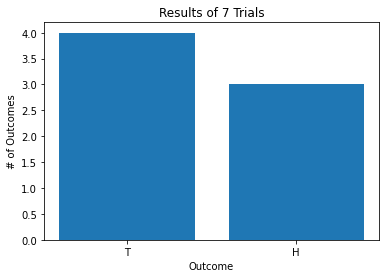

In [24]:
plot_counts(results)

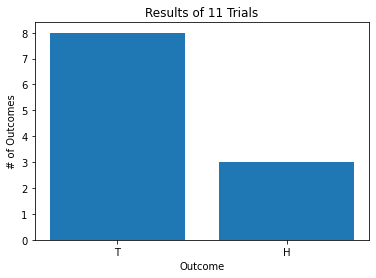

In [25]:
results = coin_toss(n_flips=11,verbose=False)#,results=None)
plot_counts(results)


In [30]:
res = coin_toss(n_flips=200,verbose=False)
res

['T',
 'H',
 'T',
 'T',
 'T',
 'T',
 'T',
 'H',
 'H',
 'T',
 'H',
 'H',
 'T',
 'T',
 'H',
 'T',
 'T',
 'T',
 'H',
 'H',
 'H',
 'T',
 'H',
 'H',
 'T',
 'H',
 'T',
 'H',
 'T',
 'T',
 'H',
 'H',
 'H',
 'T',
 'T',
 'H',
 'H',
 'H',
 'T',
 'H',
 'H',
 'H',
 'T',
 'H',
 'T',
 'T',
 'T',
 'H',
 'T',
 'H',
 'T',
 'T',
 'T',
 'H',
 'T',
 'H',
 'H',
 'H',
 'H',
 'T',
 'H',
 'H',
 'T',
 'H',
 'H',
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 'H',
 'T',
 'T',
 'T',
 'H',
 'H',
 'T',
 'T',
 'H',
 'T',
 'T',
 'H',
 'H',
 'T',
 'H',
 'H',
 'T',
 'T',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'T',
 'T',
 'T',
 'T',
 'T',
 'H',
 'H',
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 'H',
 'H',
 'T',
 'H',
 'T',
 'H',
 'H',
 'T',
 'H',
 'H',
 'T',
 'H',
 'H',
 'T',
 'H',
 'T',
 'H',
 'T',
 'T',
 'T',
 'T',
 'H',
 'T',
 'H',
 'H',
 'T',
 'H',
 'T',
 'H',
 'T',
 'T',
 'H',
 'T',
 'T',
 'T',
 'T',
 'H',
 'H',
 'H',
 'H',
 'T',
 'T',
 'H',
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 'H',
 'H',
 'T',
 'T',
 'H',
 'T',
 'T'

In [32]:
from collections import Counter
counter = Counter(res)
counter

Counter({'T': 105, 'H': 95})

## Probability Mass Function (AKA Probability Distribution Function)

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/Flashcards/Probability_Mass_Function_web.png">

[Text(0, 0.5, 'Count'), Text(0.5, 1.0, 'Histogram')]

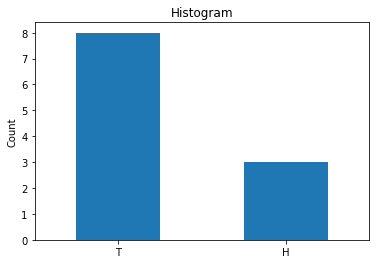

In [34]:
results_df = pd.DataFrame({'results':results,'trial #':range(1,len(results)+1)})


ax  = results_df['results'].value_counts().plot(kind='bar',rot=0)
ax.set(ylabel='Count',title='Histogram')

[Text(0, 0.5, 'Probability'),
 Text(0.5, 1.0, 'Probability Mass Function (PMF)')]

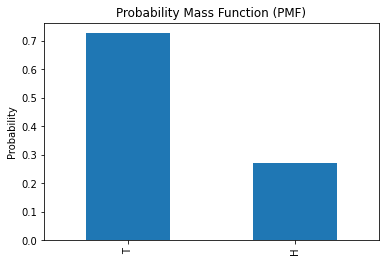

In [35]:
ax = results_df['results'].value_counts(normalize=True).plot(kind='bar')
ax.set(ylabel='Probability',title='Probability Mass Function (PMF)')

In [36]:
def compare_results(results):
    fig,ax = plt.subplots(ncols=2,figsize=(8,4))
    results_df = pd.DataFrame({'results':results,
                               'trial #':range(1,len(results)+1)})
    
    results_df['results'].value_counts().plot(kind='bar',rot=0,ax=ax[0])
    ax[0].set(ylabel='Count',title='Histogram')
    
    results_df['results'].value_counts(normalize=True).plot(kind='bar',
                                                            rot=0,
                                                            ax=ax[1],
                                                           color='g')
    ax[1].set(ylabel='Probability',title='Probability Mass Function (PMF)')
    plt.suptitle(f'Histogram vs PMF for {len(results_df)} trials')
    fig.tight_layout()
    return fig, ax

(<Figure size 576x288 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Histogram'}, ylabel='Count'>,
        <AxesSubplot:title={'center':'Probability Mass Function (PMF)'}, ylabel='Probability'>],
       dtype=object))

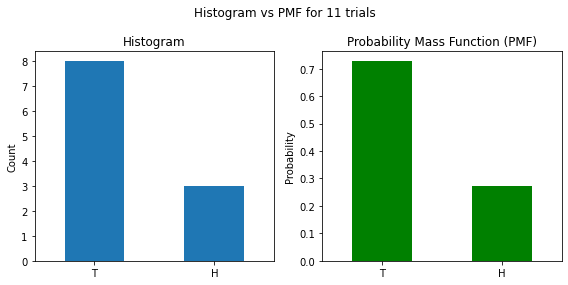

In [37]:
compare_results(results)

In [13]:
# def calc_pmf(outcomes):
    
#     pmf = [] 
#     counter= Counter(outcomes)
    
#     for k,v in counter.items():
#         pmf.append(round(v/len(outcomes),2))
#     return pmf

# def plot_pmf(counter,pmf):
#     plt.bar(counter.keys(), pmf);
#     plt.title("A Probability Mass Function");

Toss 1:   T
Toss 2:   T
Toss 3:   H
Toss 4:   H
Toss 5:   T
Toss 6:   H
Toss 7:   H
Toss 8:   T
Toss 9:   H


(<Figure size 576x288 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Histogram'}, ylabel='Count'>,
        <AxesSubplot:title={'center':'Probability Mass Function (PMF)'}, ylabel='Probability'>],
       dtype=object))

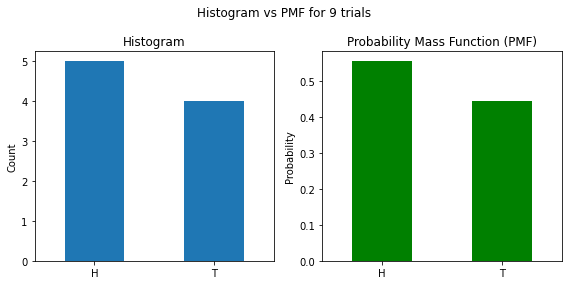

In [14]:
outcomes = coin_toss(n_flips=9)
compare_results(outcomes)

Toss 1:   T
Toss 2:   T
Toss 3:   H
Toss 4:   T
Toss 5:   H
Toss 6:   T
Toss 7:   H
Toss 8:   T
Toss 9:   T
Toss 10:   H
Toss 11:   T
Toss 12:   H
Toss 13:   T
Toss 14:   T
Toss 15:   H
Toss 16:   H
Toss 17:   T
Toss 18:   H
Toss 19:   T
Toss 20:   T
Toss 21:   H


(<Figure size 576x288 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Histogram'}, ylabel='Count'>,
        <AxesSubplot:title={'center':'Probability Mass Function (PMF)'}, ylabel='Probability'>],
       dtype=object))

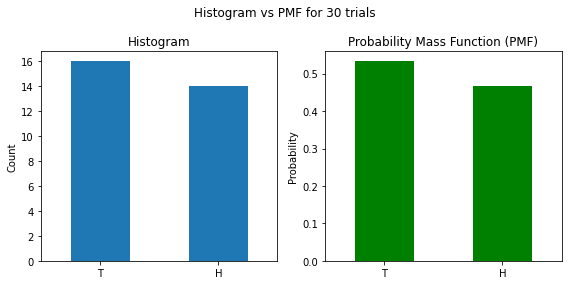

In [15]:
outcomes = coin_toss(n_flips=21,results=outcomes)
compare_results(outcomes)

(<Figure size 576x288 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Histogram'}, ylabel='Count'>,
        <AxesSubplot:title={'center':'Probability Mass Function (PMF)'}, ylabel='Probability'>],
       dtype=object))

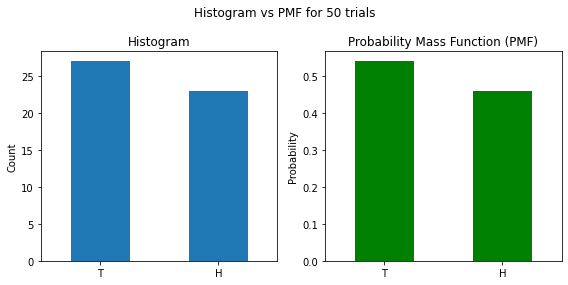

In [16]:
outcomes = coin_toss(n_flips=20,results=outcomes,verbose=False)
compare_results(outcomes)

(<Figure size 576x288 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Histogram'}, ylabel='Count'>,
        <AxesSubplot:title={'center':'Probability Mass Function (PMF)'}, ylabel='Probability'>],
       dtype=object))

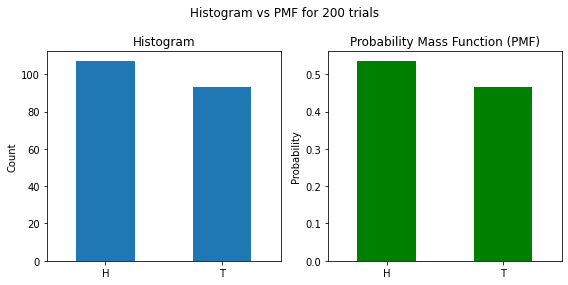

In [17]:
outcomes = coin_toss(n_flips=200,verbose=False)
compare_results(outcomes)

#### Bernoulli Distribution/Trials
- Probability of $x$ successes in $n$ trials for Bernoulli/binomial variable (binary outcome)
    - Described by only one parameter $p$


- For binomial *trial*: 
$$Y = Bernoulli(p)$$ and $p=P(Y=1)=0.8$

> RUN NINO